In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

from experiments.auto_vs_human.paranlu_auto import roberta_specialized_automatic, roberta_specialized, deberta_v3, deberta_v3_automatic

%load_ext autoreload
%autoreload 2

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 249/249 [00:00<00:00, 36935.27it/s]


Model: roberta
########################################




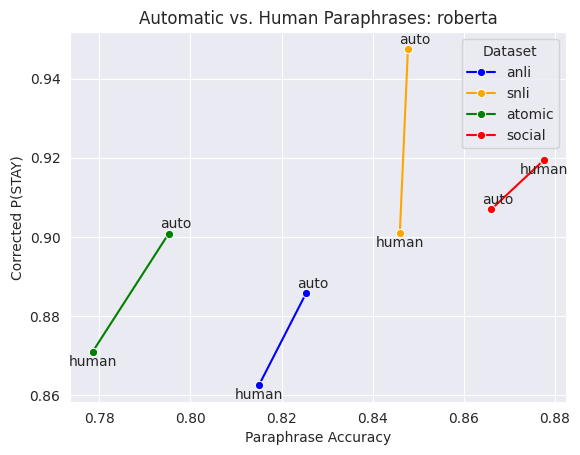

Model: deberta
########################################




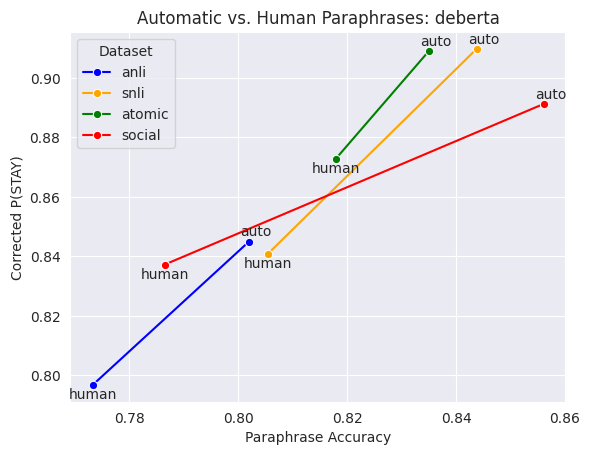

In [9]:
from simple_colors import * 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

auto_vs_human_results = {
    'roberta': {
        'human': roberta_specialized,
        'auto': roberta_specialized_automatic
    },
    'deberta': {
        'human': deberta_v3,
        'auto': deberta_v3_automatic
    }
}

for model, auto_v_human in auto_vs_human_results.items():
    print('Model:', model)

    auto = auto_v_human['auto']
    human = auto_v_human['human']

    colors = ['blue', 'orange', 'green', 'red']
    legend_labels = []
    
    for i, (data_split, auto_analysis) in enumerate(auto.items()):
        dataset = data_split.split('-')[0]
        
        human_linguistic_robustness = human[f'{dataset}-human'].linguistic_robustness_summary(human[f'{dataset}-test'])
        auto_linguistic_robustness = auto_analysis.linguistic_robustness_summary(human[f'{dataset}-test'])

        x = [human_linguistic_robustness['paraphrase_accuracy_corrected'], auto_linguistic_robustness['paraphrase_accuracy_corrected']]
        y = [human_linguistic_robustness['stay_prob_corrected'], auto_linguistic_robustness['stay_prob_corrected']]
        source = ['human', 'auto']
        legend_labels.append(dataset)
        sns.lineplot(x=x, y=y, color=colors[i], marker='o', label=dataset)

        for pt in range(len(x)):
            if pt == 0:
                plt.annotate(source[pt], (x[pt], y[pt]), textcoords="offset points", xytext=(0,-10), ha='center')
            else:
                plt.annotate(source[pt], (x[pt], y[pt]), textcoords="offset points", xytext=(5,4), ha='center')

        
    print('########################################\n\n')
    plt.legend(title='Dataset')
    plt.xlabel('Paraphrase Accuracy')
    plt.ylabel('Corrected P(STAY)')
    plt.title(f'Automatic vs. Human Paraphrases: {model}')
    plt.savefig(f'auto_vs_human_{model}.pdf')
    plt.show()